# Random Forest


In [1]:
# import

import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

import pickle

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import KFold 


In [2]:
taille_fenetre_to_run = 20
taille_stride_to_run = 5
# 20w_5s déterminer dans search window size 

In [3]:
data = pickle.load(open(f"Data/donnees_{taille_fenetre_to_run}w_{taille_stride_to_run}s.pkl", "rb"))

In [4]:
data.keys()

dict_keys(['X_np_label', 'X_np_binary', 'y_np', 'features_names_label', 'features_names_binary', 'idx_explicabilite', 'X_label_explicabilite', 'X_binary_explicabilite', 'y_explicabilite'])

In [5]:
X_np_label = data["X_np_label"]
y_np = data["y_np"]

In [6]:
X_label_explicabilite = data["X_label_explicabilite"]
y_explicabilite = data["y_explicabilite"]

In [7]:
features_label = data["features_names_label"]

In [8]:
X_np_label.shape

(19010, 152)

In [9]:
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True) 

mse_scores = []
mae_scores = []
mape_scores = []
rmse_scores = []

# déterminer par grid search : 
# Best parameters found:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1}
# Best score found:  0.02460594927348995

xgb = XGBRegressor(random_state=42, n_estimators=500, max_depth=10, learning_rate=0.1, gamma=0, reg_alpha=0.1, reg_lambda=1)

for fold, (train_index, test_index) in enumerate(kf.split(X_np_label)):
    print(f"Running fold {fold+1}/{n_splits}")
    # X_train, X_test = X_reshape[train_index], X_reshape[test_index]
    X_train, X_test = X_np_label[train_index], X_np_label[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    rmse_scores.append(rmse)

    print(f"Fold {fold+1} - MSE: {mse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    # save the model to disk
    filename = f'Models/RandomForest_{taille_fenetre_to_run}_fold_{fold}.sav'
    pickle.dump(xgb, open(filename, 'wb'))
    

Running fold 1/5
Fold 1 - MSE: 0.0111, MAE: 0.0650, MAPE: 0.0007, RMSE: 0.1051
Running fold 2/5
Fold 2 - MSE: 0.0496, MAE: 0.0667, MAPE: 0.0007, RMSE: 0.2227
Running fold 3/5
Fold 3 - MSE: 0.0119, MAE: 0.0633, MAPE: 0.0007, RMSE: 0.1093
Running fold 4/5
Fold 4 - MSE: 0.0140, MAE: 0.0660, MAPE: 0.0007, RMSE: 0.1183
Running fold 5/5
Fold 5 - MSE: 0.0365, MAE: 0.0657, MAPE: 0.0007, RMSE: 0.1910


In [10]:
# min

In [11]:
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean MAPE: {np.mean(mape_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")

Mean MSE: 0.02460594927348995
Mean MAE: 0.06533787650558535
Mean MAPE: 0.0007022614038988452
Mean RMSE: 0.14926384772358048


In [12]:
print(f'MSE scores: {mse_scores}')
print(f'MAE scores: {mae_scores}')
print(f'MAPE scores: {mape_scores}')
print(f'RMSE scores: {rmse_scores}')

MSE scores: [np.float64(0.01105147523730524), np.float64(0.04957583859857828), np.float64(0.011939015772040274), np.float64(0.013997234197498144), np.float64(0.03646618256202782)]
MAE scores: [np.float64(0.06503858091234699), np.float64(0.06671486400535258), np.float64(0.06325507906625565), np.float64(0.06597147751692152), np.float64(0.06570938102705004)]
MAPE scores: [np.float64(0.0006963839274183626), np.float64(0.0007184435842457755), np.float64(0.0006787945842604658), np.float64(0.0007112343387360403), np.float64(0.0007064505848335814)]
RMSE scores: [np.float64(0.10512599696224165), np.float64(0.2226563239581986), np.float64(0.10926580330570161), np.float64(0.11830990743592923), np.float64(0.19096120695583127)]


In [13]:
# get meilleur fold
best_fold = np.argmin(mse_scores)
print(f"Best fold: {best_fold}")

# "Si vous êtes strict sur la validation ou travaillez avec de grandes quantités de données, préférez le meilleur modèle de KFold."

Best fold: 0


In [14]:
xgb_best = pickle.load(open(f'Models/RandomForest_{taille_fenetre_to_run}_fold_{best_fold}.sav', 'rb'))

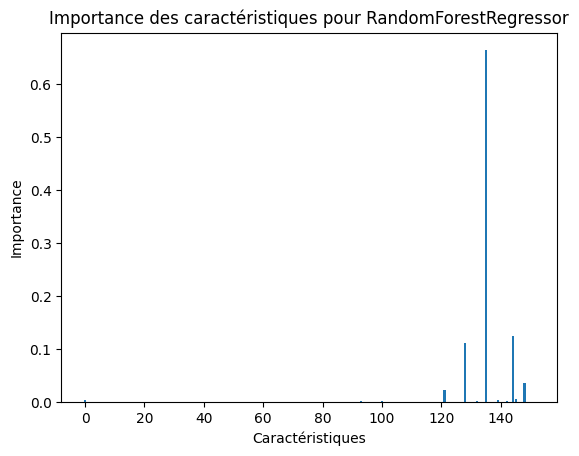

In [15]:
# Récupérer l'importance des caractéristiques
feature_importances = xgb_best.feature_importances_

# Afficher l'importance des caractéristiques sous forme de graphique
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.title('Importance des caractéristiques pour RandomForestRegressor')
plt.show()


In [16]:
print(len(features_label))
print(X_np_label.shape)
print(len(feature_importances))
# ok tout semble cohérent 

152
(19010, 152)
152


In [17]:
import shap

# Créer un explainer SHAP pour RandomForest
explainer = shap.TreeExplainer(xgb_best)

# # Calculer les valeurs SHAP pour les donnéeschoisies pour l'explicabilité
shap_values = explainer.shap_values(X_label_explicabilite)

# Visualiser les valeurs SHAP pour une prédiction
shap.initjs()  # Pour activer les visualisations interactives


/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


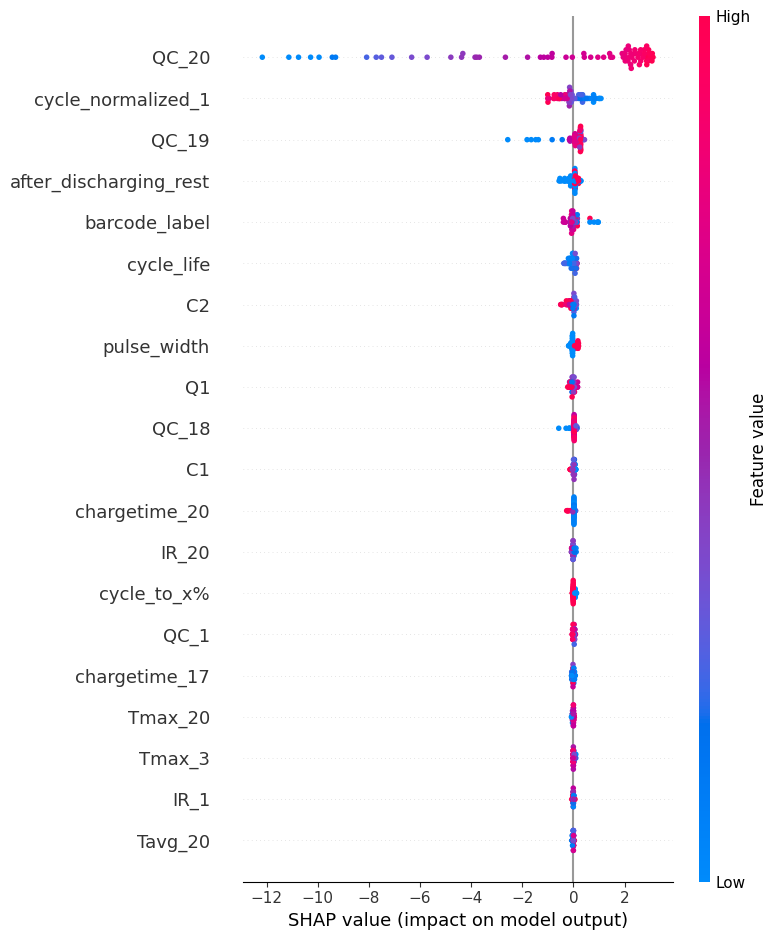

In [18]:
# Visualiser les valeurs SHAP avec un graphique résumé
shap.summary_plot(shap_values, X_label_explicabilite, feature_names=features_label, show=False)

# Sauvegarder la visualisation dans un fichier
plt.savefig(f"Images/shap_XGB_{taille_fenetre_to_run}w_{taille_stride_to_run}s.png")
plt.show()

In [19]:
# TODO explicabilité : dependance des valeurs ? dependance_plot ?
# (pour les features apparaissant dans le résumé) 

# TODO explicabilité : force_plot 
# 